In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

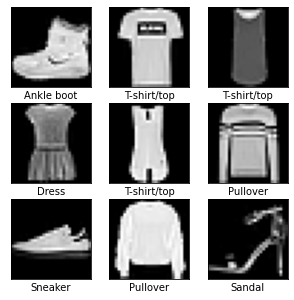

In [3]:
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
#전처리 및 검증데이터셋 만들기

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

In [6]:
model1 = Sequential()

# x_train = (x_train.reshape((60000, 28*28))) / 255

model1.add(Flatten(input_shape = (28,28)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.7656 - val_loss: 0.4966 - val_accuracy: 0.8232
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4425 - accuracy: 0.8457 - val_loss: 0.4732 - val_accuracy: 0.8319
Epoch 3/30
329/329 [==============================] - 1s 5ms/step - loss: 0.4044 - accuracy: 0.8554 - val_loss: 0.4434 - val_accuracy: 0.8445
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3838 - accuracy: 0.8624 - val_loss: 0.4064 - val_accuracy: 0.8563
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3640 - accuracy: 0.8690 - val_loss: 0.3853 - val_accuracy: 0.8661
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3450 - accuracy: 0.8765 - val_loss: 0.3668 - val_accuracy: 0.8714
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3342 - accuracy: 0.8792 - val_loss: 0.3552 - val_accuracy: 0.8726
Epoch 

In [8]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.6309 - accuracy: 0.7825 - val_loss: 0.4532 - val_accuracy: 0.8451
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4217 - accuracy: 0.8497 - val_loss: 0.4007 - val_accuracy: 0.8594
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3770 - accuracy: 0.8631 - val_loss: 0.3832 - val_accuracy: 0.8650
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3504 - accuracy: 0.8740 - val_loss: 0.3620 - val_accuracy: 0.8709
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3248 - accuracy: 0.8821 - val_loss: 0.3471 - val_accuracy: 0.8738
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3118 - accuracy: 0.8856 - val_loss: 0.3439 - val_accuracy: 0.8788
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3012 - accuracy: 0.8886 - val_loss: 0.3293 - val_accuracy: 0.8831
Epoch 

In [9]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

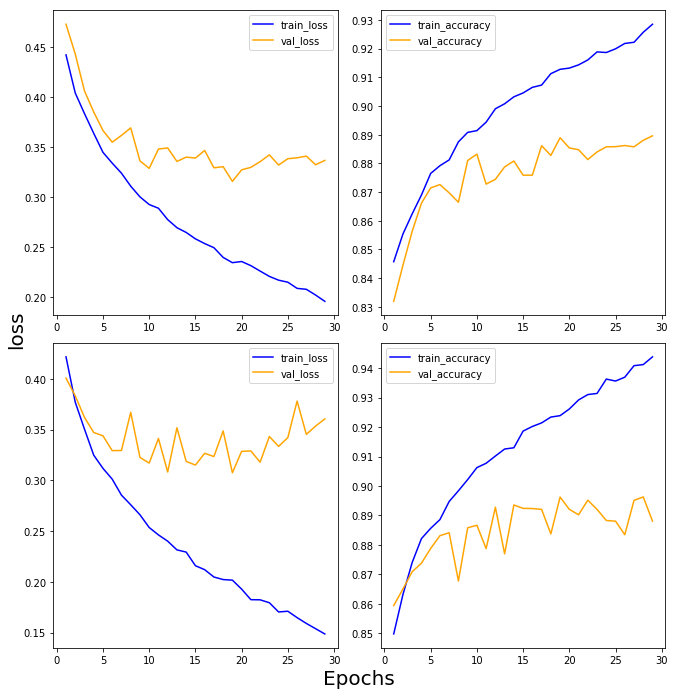

In [13]:
def draw_loss_acc(history_1, history_2, epochs):
    his_dict1 = history_1.history
    his_dict2 = history_2.history
    keys = list(his_dict1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict1)):
        temp_ax = fig.add_subplot(2,2,i+1)
        temp = keys[i%2]
        val_temp = keys[(i+2)%2 + 2]
        temp_history = his_dict1 if i < 2 else his_dict2
        temp_ax.plot(epochs, temp_history[temp][1:],
                    color = 'blue', label='train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                    color = 'orange', label=val_temp)
        if(i==1 or i==3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
    
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history1, history2, 30)

In [25]:
# 세 번째 모델

model3 = Sequential()

model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=8, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/8
329/329 [==============================] - 2s 5ms/step - loss: 0.6273 - accuracy: 0.7824 - val_loss: 0.4449 - val_accuracy: 0.8414
Epoch 2/8
329/329 [==============================] - 2s 5ms/step - loss: 0.4202 - accuracy: 0.8499 - val_loss: 0.3924 - val_accuracy: 0.8619
Epoch 3/8
329/329 [==============================] - 2s 5ms/step - loss: 0.3746 - accuracy: 0.8656 - val_loss: 0.3750 - val_accuracy: 0.8638
Epoch 4/8
329/329 [==============================] - 2s 5ms/step - loss: 0.3410 - accuracy: 0.8769 - val_loss: 0.3590 - val_accuracy: 0.8705
Epoch 5/8
329/329 [==============================] - 2s 5ms/step - loss: 0.3242 - accuracy: 0.8812 - val_loss: 0.3373 - val_accuracy: 0.8771
Epoch 6/8
329/329 [==============================] - 2s 5ms/step - loss: 0.3018 - accuracy: 0.8876 - val_loss: 0.3430 - val_accuracy: 0.8748
Epoch 7/8
329/329 [==============================] - 2s 5ms/step - loss: 0.2888 - accuracy: 0.8920 - val_loss: 0.3184 - val_accuracy: 0.8866
Epoch 8/8
329

In [26]:
# 모델 평가하기
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8748

테스트 정확도: 0.8748000264167786
